# DATA IMPORT 

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('casestudy.csv')

# Total revenue for the current year 

In [2]:
Total_Revenue =  df.groupby('year').net_revenue.sum()
print(Total_Revenue)

year
2015    29036749.19
2016    25730943.59
2017    31417495.03
Name: net_revenue, dtype: float64


For the year 

2015 - The revenue is 29036749.19 

2016 - The revenue is 25730943.59

2017 - The revenue is 31417495.03



# New Customer Revenue  

In [ ]:
import pandas as pd
import pandasql as ps

We know that the new customer revenue in 2015 is  29036749.19 

From the below queries we have 

1. new_customer_revenue_2016 = 18245491.01

2. new_customer_revenue_2017 = 28776235.04

In [13]:
new_customer_revenue_2016 =  """ select year,sum(net_revenue) from df where customer_email not in (select customer_email from df where year = '2015') and year = '2016' """

print(ps.sqldf(new_customer_revenue_2016, locals()))

   year  sum(net_revenue)
0  2016       18245491.01


In [21]:
new_customer_revenue_2017 =  """ select year,sum(net_revenue) from df where customer_email not in (select customer_email from df where year ='2016') and year = '2017' """
print(ps.sqldf(new_customer_revenue_2017, locals()))

   year  sum(net_revenue)
0  2017       28776235.04


# Existing Customer Growth. 




In [24]:
existing_customer_2016 =  """ select year,sum(net_revenue) from df where customer_email in (select customer_email from df where year ='2015') and year = '2016' """
existing_customer_2015 =  """ select year,sum(net_revenue) from df where customer_email in (select customer_email from df where year ='2016') and year = '2015' """
print(ps.sqldf(existing_customer_2016, locals()))
print(ps.sqldf(existing_customer_2015, locals()))

   year  sum(net_revenue)
0  2016        7485452.58
   year  sum(net_revenue)
0  2015        7465117.12


So we can say that the existing customer revenue growth from 2015 to 2016 is : <b> 20335.46 </b>

In [25]:
existing_customer_2017 =  """ select year,sum(net_revenue) from df where customer_email in (select customer_email from df where year ='2016') and year = '2017' """
existing_customerg_2016 =  """ select year,sum(net_revenue) from df where customer_email in (select customer_email from df where year ='2017') and year = '2016' """
print(ps.sqldf(existing_customer_2017, locals()))
print(ps.sqldf(existing_customerg_2016, locals()))

   year  sum(net_revenue)
0  2017        2641259.99
   year  sum(net_revenue)
0  2016        2620648.65


So we can say that the existing customer revenue growth from 2016 to 2017 is : <b> 20611.34 </b>


# Revenue lost from attrition

In [28]:
revenue_lost_2015 =  """ select year,sum(net_revenue) from df where customer_email not in (select customer_email from df where year ='2016') and year = '2015' """
print(ps.sqldf(revenue_lost_2015, locals()))

   year  sum(net_revenue)
0  2015      2.157163e+07


Revenue lost due to attrition in 2015 - the total revenue for the customers in 2015 and not in 2016 : 2.157163e+07


In [27]:
revenue_lost_2016 =  """ select year,sum(net_revenue) from df where customer_email not in (select customer_email from df where year ='2017') and year = '2016' """
print(ps.sqldf(revenue_lost_2016, locals()))

   year  sum(net_revenue)
0  2016       23110294.94


Revenue lost due to attrition in 2016 - the total revenue for the customers in 2016 and not in 2017 : 23110294.94

# Existing Customer Revenue Current Year 

In [31]:
existing_customer_2016 =  """ select year,sum(net_revenue) from df where customer_email in (select customer_email from df where year ='2015') and year = '2016' """
existing_customer_2017 =  """ select year,sum(net_revenue) from df where customer_email in (select customer_email from df where year ='2016') and year = '2017' """
print(ps.sqldf(existing_customer_2016, locals()))
print(ps.sqldf(existing_customer_2017, locals()))

   year  sum(net_revenue)
0  2016        7485452.58
   year  sum(net_revenue)
0  2017        2641259.99


Existing customer revenue for the year :

2015 : 29036749.19

So for the year 2016, the existing customer revenue is the total revenue generated in 2016 for the common customers in 2015 and 2016
    
2016 : 7485452.58

So for the year 2017, the existing customer revenue is the total revenue generated in 2016 for the common customers in 2016 and 2017
    
2017 : 2641259.99


# Existing Customer Revenue Prior Year 

In [32]:
existing_customer_2015 =  """ select year,sum(net_revenue) from df where customer_email in (select customer_email from df where year ='2016') and year = '2015' """
existing_customerg_2016 =  """ select year,sum(net_revenue) from df where customer_email in (select customer_email from df where year ='2017') and year = '2016' """
print(ps.sqldf(existing_customer_2015, locals()))
print(ps.sqldf(existing_customerg_2016, locals()))

   year  sum(net_revenue)
0  2015        7465117.12
   year  sum(net_revenue)
0  2016        2620648.65


Existing customer revenue for the Prior Year:

So for the year 2015, the existing customer revenue is the total revenue generated in 2015 for the common customers in 2015 and 2015

2015 : 7465117.12

So for the year 2016, the existing customer revenue is the total revenue generated in 2016 for the common customers in 2016 and 2017
    
2016 : 2620648.65
    



# Total Customers Current Year 

In [40]:
Total_customer_2015 =  """ select year,count(customer_email) from df where year = '2015' """
Total_customer_2016 =  """ select year,count(customer_email) from df where year = '2016' """
Total_customer_2017 =  """ select year,count(customer_email) from df where year = '2017' """

print(ps.sqldf(Total_customer_2015, locals()))
print(ps.sqldf(Total_customer_2016, locals()))
print(ps.sqldf(Total_customer_2017, locals()))

   year  count(customer_email)
0  2015                 231294
   year  count(customer_email)
0  2016                 204646
   year  count(customer_email)
0  2017                 249987


Total customers in each year :
    
2015 : 231294

2016 : 204646
    
2017 : 249987

# Total Customers Previous Year 

In [61]:
prevcustomers_2015 =  """select year,count(customer_email) from df where year = '2015' """
prevcustomers_2016 = """ select year,count(customer_email) from df where year = '2016' and customer_email in (select customer_email from df where year ='2015')"""
prevcustomers_2017 = """ select year,count(customer_email) from df where year = '2017' and customer_email in (select customer_email from df where year ='2016')"""


print(ps.sqldf(prevcustomers_2015, locals()))
print(ps.sqldf(prevcustomers_2016, locals()))
print(ps.sqldf(prevcustomers_2017, locals()))

   year  count(customer_email)
0  2015                 231294
   year  count(customer_email)
0  2016                  59584
   year  count(customer_email)
0  2017                  20959


# New Customers 

In [36]:
newcustomers_2015 =  """ select year,count(customer_email) from df where year = '2015' """
newcustomers_2016 = """ select year,count(customer_email) from df where year = '2016' and customer_email not in (select customer_email from df where year ='2015')"""
newcustomers_2017 = """ select year,count(customer_email) from df where year = '2017' and customer_email not in (select customer_email from df where year ='2016')"""

print(ps.sqldf(newcustomers_2015, locals()))
print(ps.sqldf(newcustomers_2016, locals()))
print(ps.sqldf(newcustomers_2017, locals()))


   year  count(customer_email)
0  2015                 231294
   year  count(customer_email)
0  2016                 145062
   year  count(customer_email)
0  2017                 229028


New customers in 2015 are the total customers in 2015 

New customers in 2016 are the customers which are not in 2015 : 145062

New customers in 2017 are the customers which are not in 2016 : 229028


# Lost Customers

In [38]:
lostcustomers_2016 = """ select count(customer_email) from df where year = '2015' and customer_email not in (select customer_email from df where year ='2016')"""
lostcustomers_2017 = """ select count(customer_email) from df where year = '2016' and customer_email not in (select customer_email from df where year ='2017')"""

print(ps.sqldf(lostcustomers_2016, locals()))
print(ps.sqldf(lostcustomers_2017, locals()))

   count(customer_email)
0                 171710
   count(customer_email)
0                 183687


Number of customers lost in 2015 will be equal to zero

Number of customers lost in 2016 will be the total number of customers in 2015 which are not in 2016 : 171710

Number of customers lost in 2017 will be the total number of customers in 2016 which are not in 2017 : 183687

Additionally, generate a few unique plots highlighting some information from the dataset. Are there any interesting observations? 

# PLOTS

Total, New and Lost customer each year 

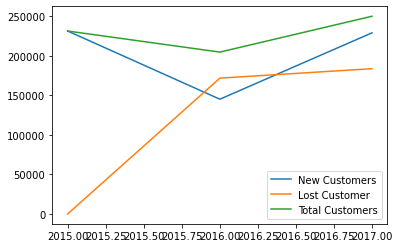

In [43]:
import matplotlib.pyplot as plt

#Data for the first line - New Customers
y1 = [231294,145062,229028]
x1 = [2015,2016, 2017]

#Data for the second line - Lost Customer
y2 = [0, 171710 , 183687]
x2 = [2015,2016, 2017]

y3  = [231294,204646,249987]
x3 = [2015,2016,2017] 
#Data for the third line - Total Customer

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)

plt.legend(["New Customers", "Lost Customer","Total Customers"])

We find that the number of customers the company lost is more in 2017. All though 2017 has more total customer it has lost major amount of existign customer from previous years

Total Revenue and Revenue from new customers

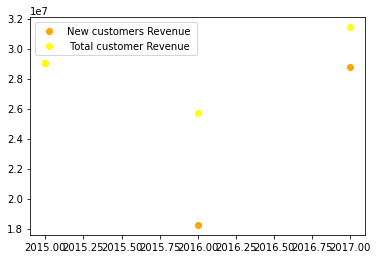

In [49]:
x = [2015, 2016,2017]
y = [29036749.19, 18245491.0,28776235.04] # New customers Revenue

y1 = [29036749.19,25730943.59, 31417495.03] # Total customer revenue 

plt.plot(x, y, 'o', color='orange')
plt.plot(x ,y1, 'o', color = 'yellow')

plt.legend(["New customers Revenue", " Total customer Revenue "])

From this graph we can say that the new customers have significant contribution in the total revenue in both 2016 and 2017. 
We can also observe an increase in the total revenue from 2015 to 2017 and more than 95% of the revenue contribution in 2017 is from the new customers.

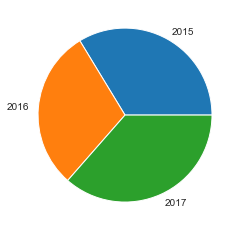

In [60]:
Tr =  df.net_revenue.sum()

y = np.array([ (29036749.19/(Tr))*100, (25730943.59/(Tr))*100 , (31417495.03/(Tr))*100])
mylabels = ["2015", "2016", "2017"]

plt.pie(y, labels = mylabels)
plt.show() 

We can say that 2017 has the max share of the total net revenue 